## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combo_df = pd.merge(mouse_metadata, study_results, how='inner', on='Mouse ID')

# Display the data table for preview
combo_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
##use the .count to count the Mouse ID in the data frame
mice_count = combo_df['Mouse ID'].count()

#display the mice_count
mice_count


1893

In [16]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
##this is strangely worded, but I think the code needed is to use .duplicated to check the Mouse ID and Timepoint columns for duplicates
###pandas documentation here: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html
####ok, so i found the actual duplicate mouse first... which is the Optional question. So now I need to figure out what the first task actually is asking for.
#duplicate_mice = combo_df[combo_df.duplicated()]
#duplicate_mice

#####might be making this more complicated than it is. thinking i need to run the same code but for the Mouse ID and Timepoint columns
duplicate_mice = combo_df[combo_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [18]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mouse = combo_df[combo_df.duplicated()]
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [19]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
##use .drop_duplicates to drop the duplicate in the 'Mouse ID' column
clean_combo_df = combo_df.drop_duplicates('Mouse ID')
clean_combo_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [20]:
# Checking the number of mice in the clean DataFrame.
##use the .count to count the Mouse ID in the cleaned combo data frame. copy/paste same code from earlier task and update.
mice_count2 = clean_combo_df['Mouse ID'].count()

#display the mice_count
mice_count2


249

## Summary Statistics

In [28]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

#for mean/median/variance/standard deviation/SEM, use .mean / .median / .var / .std / .sem. Use round for 4 sig figs.
mean = round(combo_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean(),4)
#print(mean)
##copy/paste code for respective mathematical operations

median = round(combo_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median(),4)
variance = round(combo_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var(),4)
std_dv = round(combo_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std(),4)
sem = round(combo_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem(),4)

#print(mean)
#print(median)
#print(variance)
#print(std_dv)
#print(sem)

#create a summary dataframe with the results using pd.DataFrame
summary_df = pd.DataFrame({'Mean':mean, 'Median': median, 'Variance': variance, 'Standard Deviation': std_dv, 'SEM': sem})
#summary_df.head()
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.6757,41.5578,24.9478,4.9948,0.3293
Ceftamin,52.5912,51.7762,39.2902,6.2682,0.4698
Infubinol,52.8848,51.8206,43.1287,6.5672,0.4922
Ketapril,55.2356,53.6987,68.5536,8.2797,0.6039
Naftisol,54.3316,52.5093,66.1735,8.1347,0.5965
Placebo,54.0336,52.2889,61.1681,7.8210,0.5813
Propriva,52.3226,50.8546,42.3511,6.5078,0.5129
Ramicane,40.2167,40.6732,23.4867,4.8463,0.3210
Stelasyn,54.2331,52.4317,59.4506,7.7104,0.5731


In [36]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
##Isn't this the exact same thing I just did? I think so. Just output the summary_df again.
summary_df

# Using the aggregation method, produce the same summary statistics in a single line
##Documentation here: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html
###Gonna play with the code because I'm not totally sure what is being requested.

#summary_df.agg(['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM'])
##doesn't work.

#summary_df.agg(['mean', 'median', 'var', 'std', 'sem'])
###Needed to use the mathematical functions, but need to do it for a single row... Drug Regimen?

#summary_df.agg({'Drug Regimen':['mean', 'median', 'var', 'std', 'sem']})

KeyError: "Column 'Drug Regimen' does not exist!"

## Bar and Pie Charts

Text(0, 0.5, 'Unique Mice')

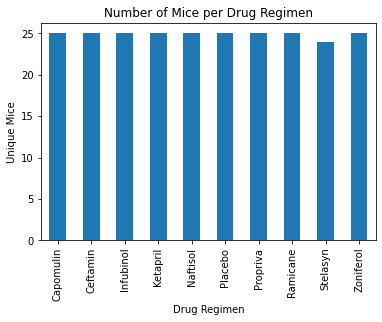

In [39]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
##I think this calls for creating a new dataframe with a groupby on Drug Regimen.
###I can use nunique to find the unique Mouse IDs.
####index documentation here: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.nunique.html
#gonna try it with both the original DF and the clean DF and see what the difference is.

barplot1_data = combo_df.groupby('Drug Regimen').nunique()['Mouse ID']
barplot1 = barplot1_data.plot.bar(title='Number of Mice per Drug Regimen')

barplot1.set_xlabel('Drug Regimen')
barplot1.set_ylabel('Unique Mice')




Text(0, 0.5, 'Unique Mice')

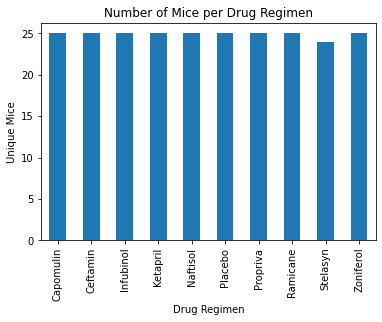

In [40]:
#try the same code but for the dataset that i didn't drop values out of.

barplot2_data = clean_combo_df.groupby('Drug Regimen').nunique()['Mouse ID']
barplot2 = barplot2_data.plot.bar(title='Number of Mice per Drug Regimen')

barplot2.set_xlabel('Drug Regimen')
barplot2.set_ylabel('Unique Mice')

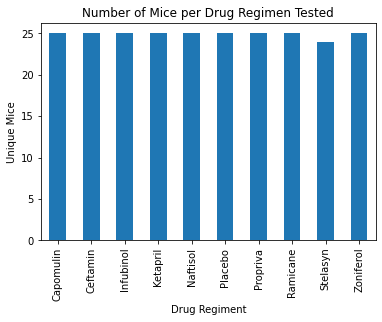

In [42]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

pyplot_data = clean_combo_df.groupby('Drug Regimen').nunique()['Mouse ID']
pyplot_df = pd.DataFrame(pyplot_data)
pyplot_df.plot.bar(legend=False)
plt.title('Number of Mice per Drug Regimen Tested')
plt.xlabel('Drug Regiment')
plt.ylabel('Unique Mice')
plt.show()


<AxesSubplot:title={'center':'Gender Distribution of Studied Mice'}, ylabel='Mouse ID'>

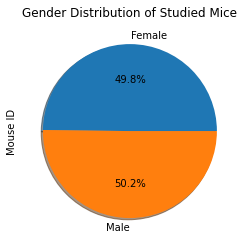

In [46]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
##nunique is awesome
###percent documentation here: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html
pd_pie_data = clean_combo_df.groupby('Sex').nunique()['Mouse ID']
pd_pie_data.plot.pie(title='Gender Distribution of Studied Mice', autopct='%1.1f%%', shadow=True)


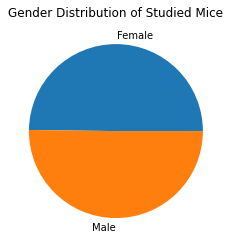

In [45]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
##same same as above pretty much, just adjusted for the pyplot syntax
###going to add some of the other pretty commands like explode and percentages based on the documentation I found 
pp_pie_data = clean_combo_df.groupby('Sex').nunique()['Mouse ID']
pp_pie_df = pd.DataFrame(pp_pie_data)
explode = (0.25, 0)
colors = ()
plt.pie(pp_pie_data, labels=pp_pie_data.index, explode=explode,)
plt.title('Gender Distribution of Studied Mice')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
